In [2]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

imgOpenCV = cv2.imread('../image/test.jpg', cv2.IMREAD_GRAYSCALE)

In [4]:
def sobel_filter(image):
    # Tính gradient theo phương ngang (Gx) và phương dọc (Gy)
    sobelx = cv2.Sobel(image, cv2.CV_64F, 1, 0, ksize=3)  # Gradient ngang
    sobely = cv2.Sobel(image, cv2.CV_64F, 0, 1, ksize=3)  # Gradient dọc
    
    # Tính độ lớn gradient
    gradient_magnitude = np.sqrt(sobelx**2 + sobely**2)
    gradient_magnitude = np.uint8(gradient_magnitude)
    
    return gradient_magnitude

In [5]:
def prewitt_filter(image):
    # Định nghĩa kernel Prewitt
    kernelx = np.array([[-1, 0, 1],
                        [-1, 0, 1],
                        [-1, 0, 1]])
    
    kernely = np.array([[-1, -1, -1],
                        [ 0,  0,  0],
                        [ 1,  1,  1]])
    
    # Tính gradient theo phương ngang và dọc
    prewittx = cv2.filter2D(image, cv2.CV_64F, kernelx)
    prewitty = cv2.filter2D(image, cv2.CV_64F, kernely)
    
    # Tính độ lớn gradient
    gradient_magnitude = np.sqrt(prewittx**2 + prewitty**2)
    gradient_magnitude = np.uint8(gradient_magnitude)
    
    return gradient_magnitude

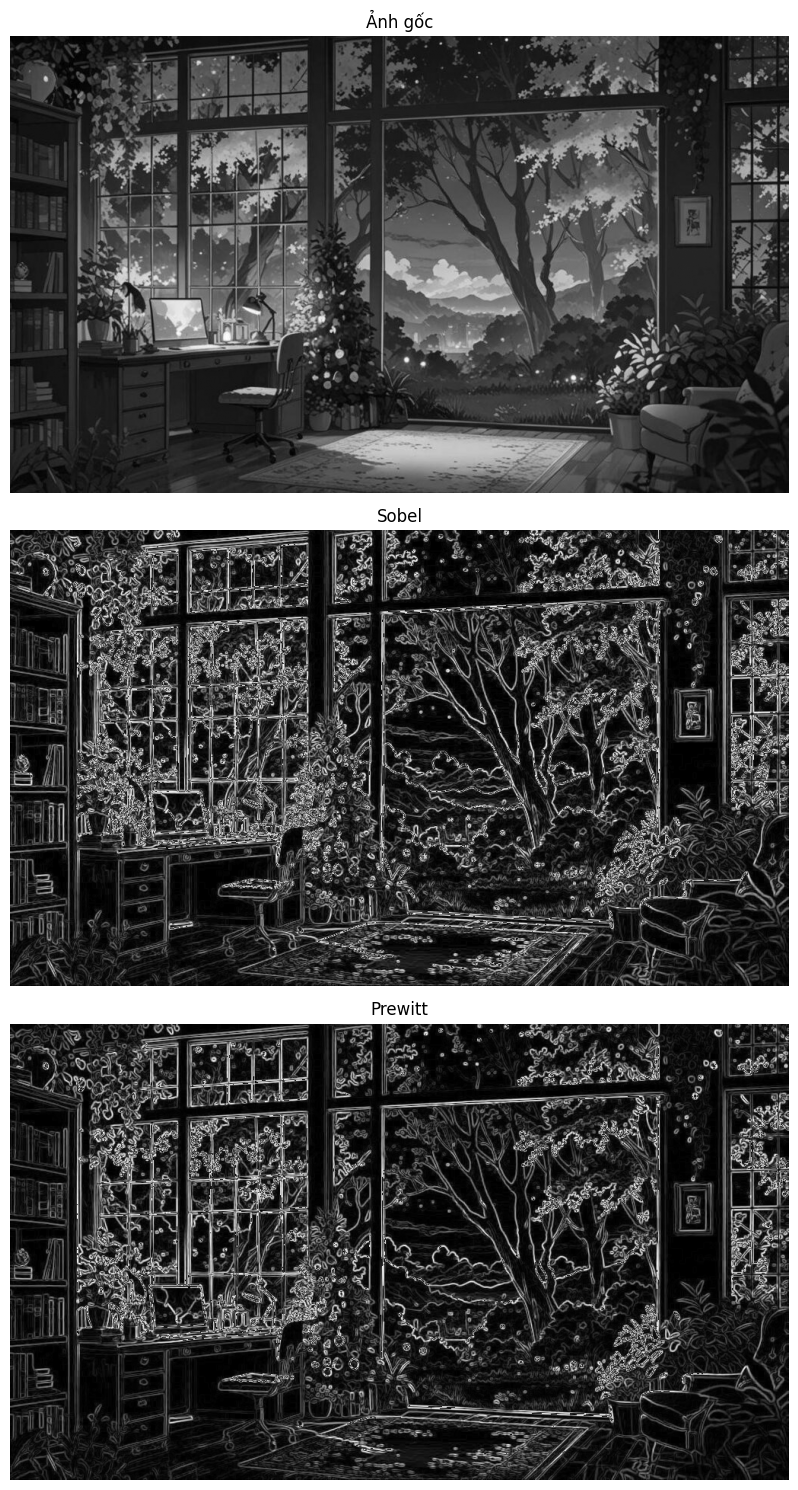

In [4]:
image_sobel = sobel_filter(imgOpenCV)
image_prewitt = prewitt_filter(imgOpenCV)

fig, axes = plt.subplots(3, 1, figsize=(10, 15))

axes[0].imshow(imgOpenCV, cmap='gray')
axes[0].set_title('Ảnh gốc')
axes[0].axis('off')

axes[1].imshow(image_sobel, cmap='gray')
axes[1].set_title('Sobel')
axes[1].axis('off')

axes[2].imshow(image_prewitt, cmap='gray')
axes[2].set_title('Prewitt')
axes[2].axis('off')

plt.tight_layout()

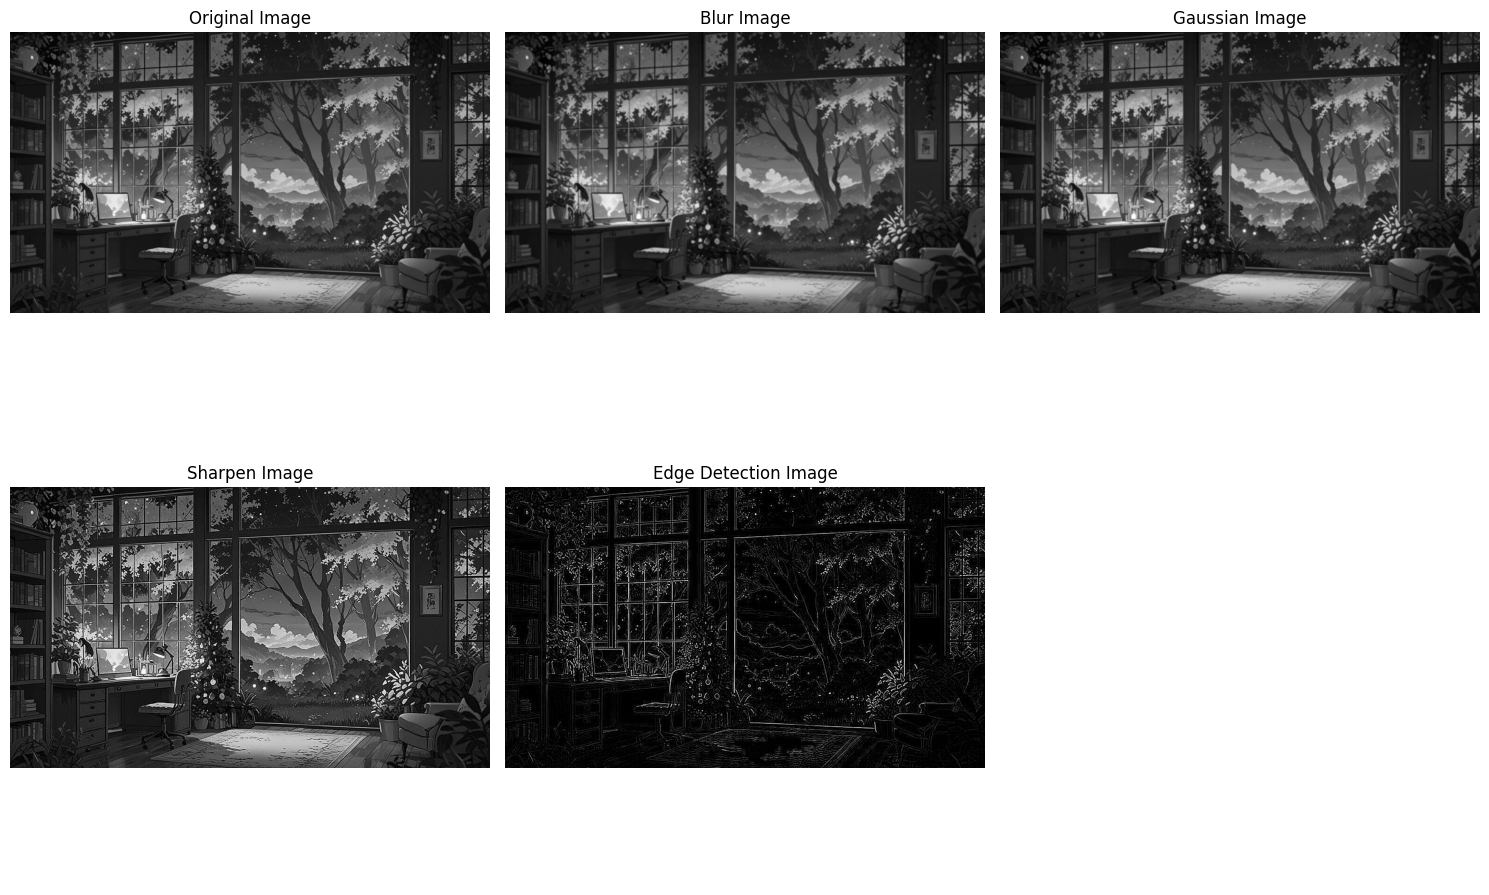

In [7]:
# làm mờ ảnh
def blur_filter(image):
    kernel_blur = np.array([
    [1,1,1],
    [1,1,1],
    [1,1,1]
])/9
    return cv2.filter2D(image, -1, kernel_blur)
# làm mờ gaussian
def gaussian_filter(image):
    kernel_gaussian = np.array([
    [1,2,1],
    [2,4,2],
    [1,2,1]
])/16
    return cv2.filter2D(image, -1, kernel_gaussian)
# làm sắc nét ảnh
def sharpen_filter(image):
    kernel_sharpen = np.array([
    [0,-1,0],
    [-1,5,-1],
    [0,-1,0]
])
    return cv2.filter2D(image, -1, kernel_sharpen)
# phát hiện cạnh biên
def edge_filter(image):
    kernel_edge = np.array([
    [-1,-1,-1],
    [-1,8,-1],
    [-1,-1,-1]
])
    return cv2.filter2D(image, -1, kernel_edge)

blur_img = blur_filter(imgOpenCV)
gaussian_img = gaussian_filter(imgOpenCV)
sharpen_img = sharpen_filter(imgOpenCV)
edge_img = edge_filter(imgOpenCV)

fig, axes = plt.subplots(2, 3, figsize=(15, 10))
axes[0, 0].imshow(imgOpenCV, cmap='gray')
axes[0, 0].set_title('Original Image')
axes[0, 0].axis('off')
axes[0, 1].imshow(blur_img, cmap='gray')
axes[0, 1].set_title('Blur Image')
axes[0, 1].axis('off')
axes[0, 2].imshow(gaussian_img, cmap='gray')
axes[0, 2].set_title('Gaussian Image')
axes[0, 2].axis('off')
axes[1, 0].imshow(sharpen_img, cmap='gray')
axes[1, 0].set_title('Sharpen Image')
axes[1, 0].axis('off')
axes[1, 1].imshow(edge_img, cmap='gray')
axes[1, 1].set_title('Edge Detection Image')
axes[1, 1].axis('off')
axes[1, 2].axis('off')
plt.tight_layout()
plt.show()


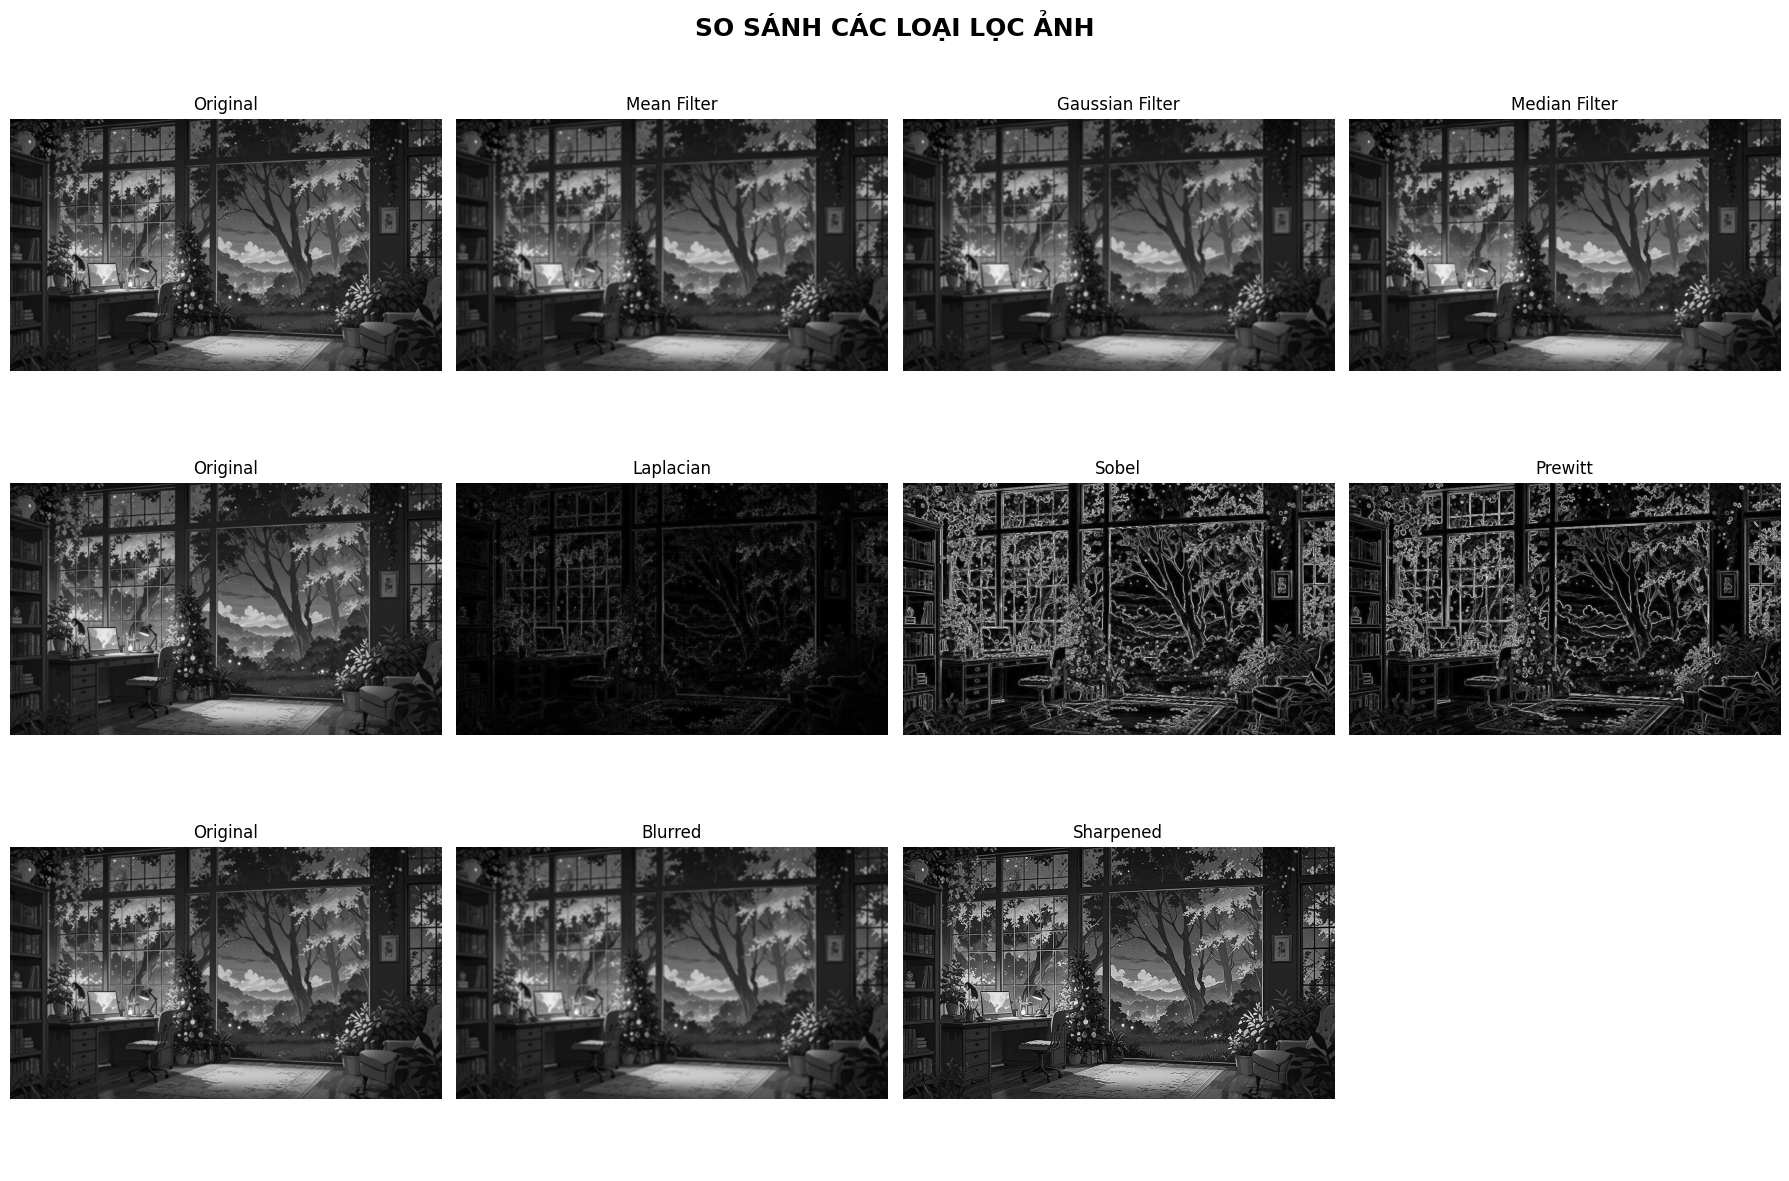

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def mean_filter(image, kernel_size=3):
    return cv2.blur(image, (kernel_size, kernel_size))

def gaussian_filter(image, kernel_size=5):
    return cv2.GaussianBlur(image, (kernel_size, kernel_size), 5)

def median_filter(image, kernel_size=3):
    if kernel_size % 2 == 0:
        raise ValueError("Kernel size phải là số lẻ")
    return cv2.medianBlur(image, kernel_size)

def laplacian_filter(image):
    laplacian = cv2.Laplacian(image, cv2.CV_64F)
    return cv2.convertScaleAbs(laplacian)

mean_img = mean_filter(imgOpenCV, kernel_size=5)
gauss_img = gaussian_filter(imgOpenCV, kernel_size=5)
median_img = median_filter(imgOpenCV, kernel_size=5)
bilateral_img = cv2.bilateralFilter(imgOpenCV, 9, 75, 75)
laplacian_img = laplacian_filter(imgOpenCV)
sobel_img = sobel_filter(imgOpenCV)
prewitt_img = prewitt_filter(imgOpenCV)
sharpen_img = sharpen_filter(imgOpenCV)

fig, axes = plt.subplots(3, 4, figsize=(18, 12))

# ===== HÀNG 1: BLUR =====
axes[0,0].imshow(imgOpenCV, cmap='gray')
axes[0,0].set_title('Original')
axes[0,0].axis('off')

axes[0,1].imshow(mean_img, cmap='gray')
axes[0,1].set_title('Mean Filter')
axes[0,1].axis('off')

axes[0,2].imshow(gauss_img, cmap='gray')
axes[0,2].set_title('Gaussian Filter')
axes[0,2].axis('off')

axes[0,3].imshow(median_img, cmap='gray')
axes[0,3].set_title('Median Filter')
axes[0,3].axis('off')

# ===== HÀNG 2: EDGE DETECTION =====
axes[1,0].imshow(imgOpenCV, cmap='gray')
axes[1,0].set_title('Original')
axes[1,0].axis('off')

axes[1,1].imshow(laplacian_img, cmap='gray')
axes[1,1].set_title('Laplacian')
axes[1,1].axis('off')

axes[1,2].imshow(sobel_img, cmap='gray')
axes[1,2].set_title('Sobel')
axes[1,2].axis('off')

axes[1,3].imshow(prewitt_img, cmap='gray')
axes[1,3].set_title('Prewitt')
axes[1,3].axis('off')

# ===== HÀNG 3: SHARPEN =====
axes[2,0].imshow(imgOpenCV, cmap='gray')
axes[2,0].set_title('Original')
axes[2,0].axis('off')

axes[2,1].imshow(gauss_img, cmap='gray')
axes[2,1].set_title('Blurred')
axes[2,1].axis('off')

axes[2,2].imshow(sharpen_img, cmap='gray')
axes[2,2].set_title('Sharpened')
axes[2,2].axis('off')

axes[2,3].axis('off')

plt.suptitle('SO SÁNH CÁC LOẠI LỌC ẢNH', fontsize=18, fontweight='bold')
plt.tight_layout()
plt.show()

(np.float64(-0.5), np.float64(1023.5), np.float64(599.5), np.float64(-0.5))

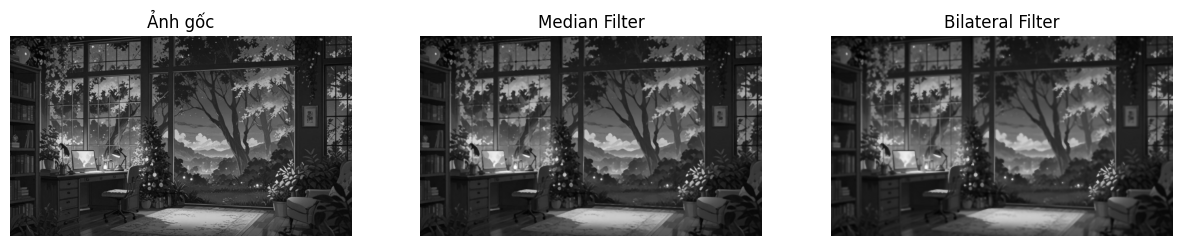

In [71]:
median_img = median_filter(imgOpenCV, 5)
bilateral_img = cv2.bilateralFilter(imgOpenCV, 9, 75, 75)
fig, axes = plt.subplots(1, 3, figsize=(15, 10))

axes[0].imshow(imgOpenCV, cmap='gray')
axes[0].set_title("Ảnh gốc")
axes[0].axis("off")

axes[1].imshow(median_img, cmap='gray')
axes[1].set_title("Median Filter")
axes[1].axis("off")

axes[2].imshow(bilateral_img, cmap='gray')
axes[2].set_title("Bilateral Filter")
axes[2].axis("off")

